In [1]:
%load_ext blackcellmagic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.optimize import root_scalar
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rc('text', usetex=True)
from numba import jit

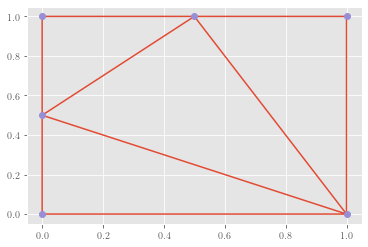

In [2]:
points = np.array([[0, 0], [0, 1], [0, 0.5], [0.5, 1], [1, 0], [1, 1]])
from scipy.spatial import Delaunay

tri = Delaunay(points)


plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], "o")
plt.show()

In [3]:
x = np.linspace(0,1, 21)
y = np.linspace(0,1,21)
points = np.array([
    [xx,yy] for xx in x for yy in y]

)

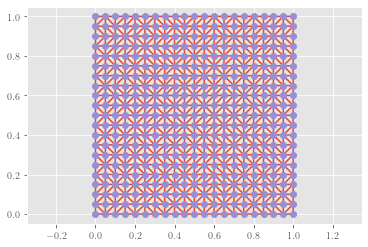

In [4]:
tri = Delaunay(points)


plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.axis("equal")
plt.show()

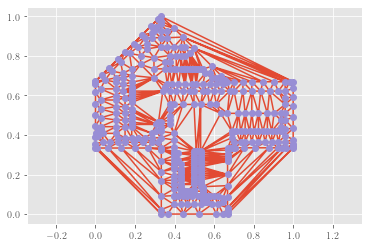

In [5]:
points = np.genfromtxt("lik3.txt")[:, [0,1]]

from scipy.spatial import Delaunay
tri = Delaunay(points)

%matplotlib inline
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.axis("equal")
plt.show()

In [6]:
def get_outer(M):
    #M = 25
    t = np.linspace(0, 1, M)

    prvi = np.zeros((M, 2), dtype=float)
    prvi[:, 1] = 1 / 3 + 1 / 3 * t

    drugi = np.zeros((M, 2), dtype=float)
    drugi[:, 0] = 1 / 3 * t
    drugi[:, 1] = 2 / 3 + 1 / 3 * t

    tretji = np.zeros((M, 2), dtype=float)
    tretji[:, 0] = 1 / 3 + 1 / 3 * t
    tretji[:, 1] = 1 - 1 / 3 * t

    cetrti = np.zeros((M, 2), dtype=float)
    cetrti[:, 0] = 2 / 3 + 1 / 3 * t
    cetrti[:, 1] = 2 / 3

    peti = np.zeros((M, 2), dtype=float)
    peti[:, 0] = 1
    peti[:, 1] = 2 / 3 - 1 / 3 * t

    sesti = np.zeros((M, 2), dtype=float)
    sesti[:, 0] = 1 - 1 / 3 * t
    sesti[:, 1] = 1 / 3

    sedmi = np.zeros((M, 2), dtype=float)
    sedmi[:, 0] = 2 / 3
    sedmi[:, 1] = 1 / 3 - 1 / 3 * t

    osmi = np.zeros((M, 2), dtype=float)
    osmi[:, 0] = 2 / 3 - 1 / 3 * t
    osmi[:, 1] = 0

    deveti = np.zeros((M, 2), dtype=float)
    deveti[:, 0] = 1 / 3
    deveti[:, 1] = 1 / 3 * t

    deseti = np.zeros((M, 2), dtype=float)
    deseti[:, 0] = 1 / 3 - 1 / 3 * t
    deseti[:, 1] = 1 / 3

    vsi = np.concatenate(
        (
            prvi,
            drugi,
            tretji,
            cetrti,
            peti,
            sesti,
            sedmi,
            osmi,
            deveti,
            deseti,
        )
    )
    return vsi


def pogoj(x, y):
    if y < 1 / 3:
        if 1 <= 3 * x <= 2:
            return True
    elif 1 <= 3 * y <= 2:
        return True
    elif y > 2 / 3:
        if x > 2 / 3:
            return False
        elif 0 < x < 1 / 3:
            return y < x + 2 / 3
        elif 1 / 3 < x < 2 / 3:
            return y < -x + 4 / 3
        else:
            return False
    return False


def get_tocke(N):
    tocke = np.random.random((N, 2))
    for i, pair in enumerate(tocke):
        while not pogoj(pair[0], pair[1]):
            pair[0], pair[1] = np.random.random((2, 1))
        tocke[i] = pair
    return tocke

%matplotlib qt
tocke = get_tocke(500)
outer = get_outer(10)
plt.scatter(tocke[:, 0], tocke[:, 1], c="k")
plt.scatter(outer[:, 0], outer[:, 1])
plt.axes().set_aspect("equal")
plt.show()

<ipython-input-6-9b7ffee7f453>:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect("equal")


<ipython-input-7-7f6b1f403cd0>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect("equal")


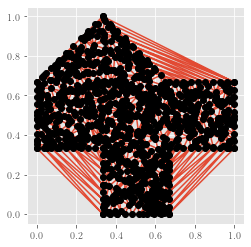

In [7]:
tocke = get_tocke(1000)
outer = get_outer(10)
arej = np.concatenate((tocke, outer))
tri = Delaunay(arej)
%matplotlib inline
plt.triplot(arej[:,0], arej[:,1], tri.simplices)
plt.plot(arej[:,0], arej[:,1], 'ko')
plt.axes().set_aspect("equal")
plt.show()

In [8]:
outer.shape

(100, 2)

In [9]:
tocke[0]

array([0.45068746, 0.60883967])

# Kvadratna opna

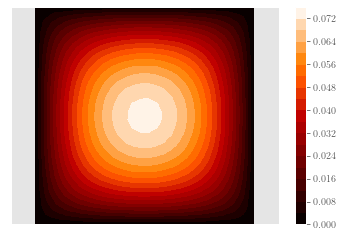

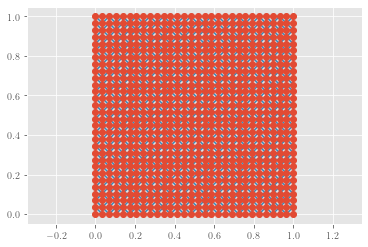

In [20]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial import delaunay_plot_2d
import matplotlib.pyplot as plt


m = 30
n = m
M = m
N = n


def pravokotnik():
    h_m = 1 / (m - 1)
    h_n = 1 / (n - 1)
    x = np.arange(1, m - 1, 1) / (m - 1)
    y = np.arange(1, n - 1, 1) / (n - 1)  # excludes boundary nodes
    U = []
    for i in range(len(x)):
        for j in range(len(y)):
            U.append([x[i], y[j]])

    # boundary nodes
    # left
    y = np.arange(0, n, 1) / (n - 1)
    for i in range(len(y)):
        U.append([0, y[i]])

    # top
    for i in range(len(x)):
        U.append([x[i], 1])

    # right
    for i in range(len(y)):
        U.append([1, y[i]])
    # bottom
    x = np.arange(1, m - 1, 1) / (m - 1)
    for i in range(len(x)):
        U.append([x[i], 0])

    return U


# print(pravokotnik())

tri = Delaunay(pravokotnik(), furthest_site=False)  # triangulation
nodes = tri.simplices  # we get the nodes of triangles
# print(nodes)
points = pravokotnik()  # coordinates of the points
# print(points)

K = np.zeros((n * m, n * m))
F = np.zeros(n * m)
T = len(nodes)
k = 0
for i in range(T):
    l, m, n = (
        nodes[k][0],
        nodes[k][1],
        nodes[k][2],
    )  # x1, x2 and x3 nodes of triangle; not the coordinates
    # print(l,m,n)
    Pe = [
        [1, points[l][0], points[l][1]],
        [1, points[m][0], points[m][1]],
        [1, points[n][0], points[n][1]],
    ]  # matrix with 1,x1,x2,x3,y1,y2,y3
    Pe = np.array(Pe)  # matrix for a triangle
    jac_det = np.linalg.det(Pe)  # 2 * area of the triangle

    # computing local stiffness matrix elements
    A11 = (
        (points[m][1] - points[n][1]) ** 2 + (points[n][0] - points[m][0]) ** 2
    ) / jac_det
    A12 = (
        (points[m][1] - points[n][1]) * (points[n][1] - points[l][1])
        + (points[n][0] - points[m][0]) * (points[l][0] - points[n][0])
    ) / jac_det
    A13 = (
        (points[m][1] - points[n][1]) * (points[l][1] - points[m][1])
        + (points[n][0] - points[m][0]) * (points[m][0] - points[l][0])
    ) / jac_det
    A22 = (
        (points[n][1] - points[l][1]) * (points[n][1] - points[l][1])
        + (points[l][0] - points[n][0]) * (points[l][0] - points[n][0])
    ) / jac_det
    A23 = (
        (points[n][1] - points[l][1]) * (points[l][1] - points[m][1])
        + (points[l][0] - points[n][0]) * (points[m][0] - points[l][0])
    ) / jac_det
    A33 = (
        (points[l][1] - points[m][1]) ** 2 + (points[m][0] - points[l][0]) ** 2
    ) / jac_det
    # print('A11:',A11,'\nA12:',A12, '\nA12:',A13,'\nA22:',A22,'\nA23:',A23,'\nA33: ', A33)

    K[l][l] = K[l][l] + A11
    K[l][m] = K[l][m] + A12
    K[m][l] = K[m][l] + A12
    K[l][n] = K[l][n] + A13
    K[n][l] = K[n][l] + A13
    K[m][m] = K[m][m] + A22
    K[m][n] = K[m][n] + A23
    K[n][m] = K[n][m] + A23
    K[n][n] = K[n][n] + A33
    # print(K[0][0], K[1][1],K[1][0],K[0][1])

    Fe = jac_det / 3  # in truth 1/6 but it's easier to consider 1/2 here
    F[l] = F[l] + Fe
    F[m] = F[m] + Fe
    F[n] = F[n] + Fe
    k = k + 1


b = np.arange(M * N - 2 * (N + M) + 4, M * N, 1)  # boundary nodes


Fb = F
for i in b:
    Fb[i] = 0
Kb = K

for i in range(len(points)):
    for j in b:
        Kb[i][j] = 0
        Kb[j][i] = 0
for i in b:
    Kb[i][i] = 1


Phi = np.linalg.solve(Kb, Fb)


X = []
Y = []
for i in range(len(points)):
    X.append(points[i][0])
    Y.append((points[i][1]))

plt.figure(0)
plt.tricontourf(X, Y, Phi, levels=20, cmap="gist_heat")
plt.colorbar()
plt.axis("equal")
plt.xticks([])
plt.yticks([])
plt.savefig(f"0-kvadratna-u-{m}.pdf")
plt.show()


delaunay_plot_2d(tri)
plt.axis("equal")
plt.savefig(f"0-kvadratna-delauney-{m}.pdf")
plt.show()

In [20]:
len(tri.simplices)

32

In [38]:
def do(m):
    n = m
    M = m
    N = n


    def pravokotnik():
        h_m = 1 / (m - 1)
        h_n = 1 / (n - 1)
        x = np.arange(1, m - 1, 1) / (m - 1)
        y = np.arange(1, n - 1, 1) / (n - 1)  # excludes boundary nodes
        U = []
        for i in range(len(x)):
            for j in range(len(y)):
                U.append([x[i], y[j]])

        # boundary nodes
        # left
        y = np.arange(0, n, 1) / (n - 1)
        for i in range(len(y)):
            U.append([0, y[i]])

        # top
        for i in range(len(x)):
            U.append([x[i], 1])

        # right
        for i in range(len(y)):
            U.append([1, y[i]])
        # bottom
        x = np.arange(1, m - 1, 1) / (m - 1)
        for i in range(len(x)):
            U.append([x[i], 0])

        return U


    # print(pravokotnik())

    tri = Delaunay(pravokotnik(), furthest_site=False)  # triangulation
    nodes = tri.simplices  # we get the nodes of triangles
    # print(nodes)
    points = pravokotnik()  # coordinates of the points
    # print(points)

    K = np.zeros((n * m, n * m))
    F = np.zeros(n * m)
    T = len(nodes)
    k = 0
    for i in range(T):
        l, m, n = (
            nodes[k][0],
            nodes[k][1],
            nodes[k][2],
        )  # x1, x2 and x3 nodes of triangle; not the coordinates
        # print(l,m,n)
        Pe = [
            [1, points[l][0], points[l][1]],
            [1, points[m][0], points[m][1]],
            [1, points[n][0], points[n][1]],
        ]  # matrix with 1,x1,x2,x3,y1,y2,y3
        Pe = np.array(Pe)  # matrix for a triangle
        jac_det = np.linalg.det(Pe)  # 2 * area of the triangle

        # computing local stiffness matrix elements
        A11 = (
            (points[m][1] - points[n][1]) ** 2 + (points[n][0] - points[m][0]) ** 2
        ) / jac_det
        A12 = (
            (points[m][1] - points[n][1]) * (points[n][1] - points[l][1])
            + (points[n][0] - points[m][0]) * (points[l][0] - points[n][0])
        ) / jac_det
        A13 = (
            (points[m][1] - points[n][1]) * (points[l][1] - points[m][1])
            + (points[n][0] - points[m][0]) * (points[m][0] - points[l][0])
        ) / jac_det
        A22 = (
            (points[n][1] - points[l][1]) * (points[n][1] - points[l][1])
            + (points[l][0] - points[n][0]) * (points[l][0] - points[n][0])
        ) / jac_det
        A23 = (
            (points[n][1] - points[l][1]) * (points[l][1] - points[m][1])
            + (points[l][0] - points[n][0]) * (points[m][0] - points[l][0])
        ) / jac_det
        A33 = (
            (points[l][1] - points[m][1]) ** 2 + (points[m][0] - points[l][0]) ** 2
        ) / jac_det
        # print('A11:',A11,'\nA12:',A12, '\nA12:',A13,'\nA22:',A22,'\nA23:',A23,'\nA33: ', A33)

        K[l][l] = K[l][l] + A11
        K[l][m] = K[l][m] + A12
        K[m][l] = K[m][l] + A12
        K[l][n] = K[l][n] + A13
        K[n][l] = K[n][l] + A13
        K[m][m] = K[m][m] + A22
        K[m][n] = K[m][n] + A23
        K[n][m] = K[n][m] + A23
        K[n][n] = K[n][n] + A33
        # print(K[0][0], K[1][1],K[1][0],K[0][1])

        Fe = jac_det / 3  # in truth 1/6 but it's easier to consider 1/2 here
        """F[l]=F[l] + ((points[m][0]-points[l][0])*(points[n][1]-points[l][1]) -
             (points[n][0]-points[l][0])*(points[m][1]-points[l][1]))/6
        F[m]=F[m] + ((points[n][0]-points[m][0])*(points[l][1]-points[m][1]) -
            (points[l][0]-points[m][0])*(points[n][1]-points[m][1]))/6
        F[n]=F[n] + ((points[l][0]-points[n][0])*(points[m][1]-points[n][1]) -
             (points[m][0]-points[n][0])*(points[l][1]-points[n][1]))/6"""
        F[l] = F[l] + Fe
        F[m] = F[m] + Fe
        F[n] = F[n] + Fe
        k = k + 1


    b = np.arange(M * N - 2 * (N + M) + 4, M * N, 1)  # boundary nodes


    Fb = F
    for i in b:
        Fb[i] = 0
    Kb = K

    for i in range(len(points)):
        for j in b:
            Kb[i][j] = 0
            Kb[j][i] = 0
    for i in b:
        Kb[i][i] = 1


    Phi = np.linalg.solve(Kb, Fb)
    



In [45]:
import time
ns = np.linspace(10, 100, 50, dtype=int)
ts = np.empty_like(ns, dtype=int)

for i, n in enumerate(ns):
    print(n, end="\r")
    start = time.time_ns()
    do(n)
    end = time.time_ns()
    import gc
    gc.collect()
    time.sleep(1)
    ts[i] = end-start


KeyboardInterrupt: 

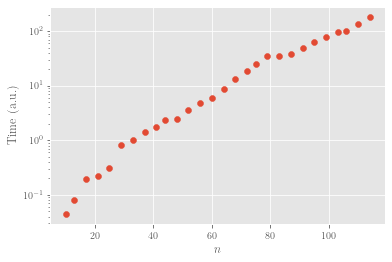

In [54]:
plt.scatter(ns[0:28], ts[0:28]*1e-9)
plt.semilogy()
plt.xlabel("$n$")
plt.ylabel("Time (a.u.)")
plt.savefig("0-speed.pdf")
plt.show()


# K liku

<ipython-input-10-d8f70400d2aa>:115: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect("equal")


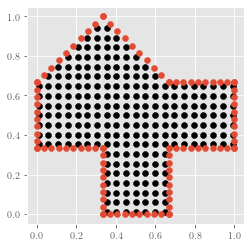

In [10]:
def pogoj_znotraj(x, y):
    if y < 1 / 3:
        if 1 <= 3 * x <= 2:
            return True
    elif 1 <= 3 * y <= 2:
        return True
    elif y > 2 / 3:
        if x > 2 / 3:
            return False
        elif 0 < x < 1 / 3:
            return y < x + 2 / 3
        elif 1 / 3 < x < 2 / 3:
            return y < -x + 4 / 3
        else:
            return False
    return False
def get_outer(M):
    #M = 25
    t = np.linspace(0, 1, M)

    prvi = np.zeros((M, 2), dtype=float)
    prvi[:, 1] = 1 / 3 + 1 / 3 * t

    drugi = np.zeros((M, 2), dtype=float)
    drugi[:, 0] = 1 / 3 * t
    drugi[:, 1] = 2 / 3 + 1 / 3 * t

    tretji = np.zeros((M, 2), dtype=float)
    tretji[:, 0] = 1 / 3 + 1 / 3 * t
    tretji[:, 1] = 1 - 1 / 3 * t

    cetrti = np.zeros((M, 2), dtype=float)
    cetrti[:, 0] = 2 / 3 + 1 / 3 * t
    cetrti[:, 1] = 2 / 3

    peti = np.zeros((M, 2), dtype=float)
    peti[:, 0] = 1
    peti[:, 1] = 2 / 3 - 1 / 3 * t

    sesti = np.zeros((M, 2), dtype=float)
    sesti[:, 0] = 1 - 1 / 3 * t
    sesti[:, 1] = 1 / 3

    sedmi = np.zeros((M, 2), dtype=float)
    sedmi[:, 0] = 2 / 3
    sedmi[:, 1] = 1 / 3 - 1 / 3 * t

    osmi = np.zeros((M, 2), dtype=float)
    osmi[:, 0] = 2 / 3 - 1 / 3 * t
    osmi[:, 1] = 0

    deveti = np.zeros((M, 2), dtype=float)
    deveti[:, 0] = 1 / 3
    deveti[:, 1] = 1 / 3 * t

    deseti = np.zeros((M, 2), dtype=float)
    deseti[:, 0] = 1 / 3 - 1 / 3 * t
    deseti[:, 1] = 1 / 3

    vsi = np.concatenate(
        (
            prvi,
            drugi,
            tretji,
            cetrti,
            peti,
            sesti,
            sedmi,
            osmi,
            deveti,
            deseti,
        )
    )
    return vsi


def pogoj(x, y):
    if y < 1 / 3:
        if 1 < 3 * x < 2:
            return True
    elif 1 < 3 * y < 2:
        return True
    elif y > 2 / 3:
        if x > 2 / 3:
            return False
        elif 0 < x < 1 / 3:
            return y < x + 2 / 3
        elif 1 / 3 < x < 2 / 3:
            return y < -x + 4 / 3
        else:
            return False
    return False


def get_tocke_random(N):
    tocke = np.random.random((N, 2))
    for i, pair in enumerate(tocke):
        while not pogoj(pair[0], pair[1]):
            pair[0], pair[1] = np.random.random((2, 1))
        tocke[i] = pair
    return tocke
def get_tocke(N):
    h = 1e-2
    t = np.linspace(0+h, 1-h, N)
    x = t.copy()
    y = t.copy()
    tocke = np.array([[i,j] for i in x for j in y if pogoj(i,j)])
    return tocke

%matplotlib inline
tocke = get_tocke(21)
outer = get_outer(10)
plt.scatter(tocke[:, 0], tocke[:, 1], c="k")
plt.scatter(outer[:, 0], outer[:, 1])
plt.axes().set_aspect("equal")
plt.savefig(f"1-f-mreza.pdf")
plt.show()


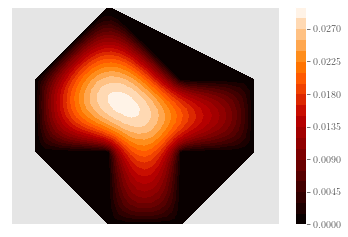

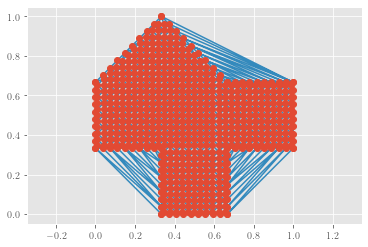

In [21]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial import delaunay_plot_2d
import matplotlib.pyplot as plt




tocke = get_tocke(33)
outer = get_outer(10)
len_outer = outer.shape[0]

points = np.concatenate([outer, tocke])

len_all = points.shape[0]


tri = Delaunay(points, furthest_site=False)  # triangulation
nodes = tri.simplices  # we get the nodes of triangles
# print(nodes)


K = np.zeros((len_all, len_all))
F = np.zeros(len_all)

T = len(nodes)
k = 0
for i in range(T):
    l, m, n = (
        nodes[k][0],
        nodes[k][1],
        nodes[k][2],
    )  # x1, x2 and x3 nodes of triangle; not the coordinates
    # print(l,m,n)
    Pe = [
        [1, points[l][0], points[l][1]],
        [1, points[m][0], points[m][1]],
        [1, points[n][0], points[n][1]],
    ]  # matrix with 1,x1,x2,x3,y1,y2,y3
    Pe = np.array(Pe)  # matrix for a triangle
    jac_det = np.linalg.det(Pe)  # 2 * area of the triangle

    # computing local stiffness matrix elements
    A11 = (
        (points[m][1] - points[n][1]) ** 2 + (points[n][0] - points[m][0]) ** 2
    ) / jac_det
    A12 = (
        (points[m][1] - points[n][1]) * (points[n][1] - points[l][1])
        + (points[n][0] - points[m][0]) * (points[l][0] - points[n][0])
    ) / jac_det
    A13 = (
        (points[m][1] - points[n][1]) * (points[l][1] - points[m][1])
        + (points[n][0] - points[m][0]) * (points[m][0] - points[l][0])
    ) / jac_det
    A22 = (
        (points[n][1] - points[l][1]) * (points[n][1] - points[l][1])
        + (points[l][0] - points[n][0]) * (points[l][0] - points[n][0])
    ) / jac_det
    A23 = (
        (points[n][1] - points[l][1]) * (points[l][1] - points[m][1])
        + (points[l][0] - points[n][0]) * (points[m][0] - points[l][0])
    ) / jac_det
    A33 = (
        (points[l][1] - points[m][1]) ** 2 + (points[m][0] - points[l][0]) ** 2
    ) / jac_det
    # print('A11:',A11,'\nA12:',A12, '\nA12:',A13,'\nA22:',A22,'\nA23:',A23,'\nA33: ', A33)

    K[l][l] = K[l][l] + A11
    K[l][m] = K[l][m] + A12
    K[m][l] = K[m][l] + A12
    K[l][n] = K[l][n] + A13
    K[n][l] = K[n][l] + A13
    K[m][m] = K[m][m] + A22
    K[m][n] = K[m][n] + A23
    K[n][m] = K[n][m] + A23
    K[n][n] = K[n][n] + A33
    # print(K[0][0], K[1][1],K[1][0],K[0][1])

    Fe = jac_det / 3  # in truth 1/6 but it's easier to consider 1/2 here
    """F[l]=F[l] + ((points[m][0]-points[l][0])*(points[n][1]-points[l][1]) -
         (points[n][0]-points[l][0])*(points[m][1]-points[l][1]))/6
    F[m]=F[m] + ((points[n][0]-points[m][0])*(points[l][1]-points[m][1]) -
        (points[l][0]-points[m][0])*(points[n][1]-points[m][1]))/6
    F[n]=F[n] + ((points[l][0]-points[n][0])*(points[m][1]-points[n][1]) -
         (points[m][0]-points[n][0])*(points[l][1]-points[n][1]))/6"""
    F[l] = F[l] + Fe
    F[m] = F[m] + Fe
    F[n] = F[n] + Fe
    k = k + 1


b = [i for i in range(len_outer)]  # boundary nodes


Fb = F
for i in b:
    Fb[i] = 0
Kb = K

for i in range(len(points)):
    for j in b:
        Kb[i][j] = 0
        Kb[j][i] = 0
for i in b:
    Kb[i][i] = 1


Phi = np.linalg.solve(Kb, Fb)


X = []
Y = []
for i in range(len(points)):
    X.append(points[i][0])
    Y.append((points[i][1]))
%matplotlib inline
plt.figure(0)
plt.tricontourf(X, Y, Phi, levels=20, cmap="gist_heat")
plt.colorbar()
plt.axis("equal")
plt.xticks([])
plt.yticks([])
plt.savefig(f"1-lik-u-{len_outer}.pdf")
plt.show()


delaunay_plot_2d(tri)
plt.axis("equal")
plt.savefig(f"1-lik-delauney-{len_outer}.pdf")
plt.show()

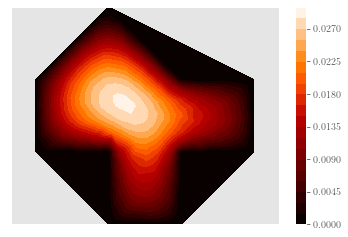

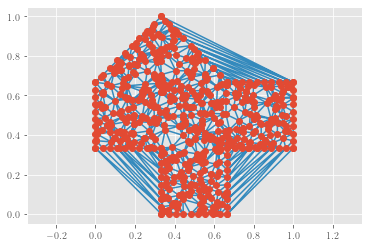

In [20]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial import delaunay_plot_2d
import matplotlib.pyplot as plt




tocke = get_tocke_random(500)
outer = get_outer(10)
len_outer = outer.shape[0]

points = np.concatenate([outer, tocke])

len_all = points.shape[0]


tri = Delaunay(points, furthest_site=False)  # triangulation
nodes = tri.simplices  # we get the nodes of triangles
# print(nodes)


K = np.zeros((len_all, len_all))
F = np.zeros(len_all)

T = len(nodes)
k = 0
for i in range(T):
    l, m, n = (
        nodes[k][0],
        nodes[k][1],
        nodes[k][2],
    )  # x1, x2 and x3 nodes of triangle; not the coordinates
    # print(l,m,n)
    Pe = [
        [1, points[l][0], points[l][1]],
        [1, points[m][0], points[m][1]],
        [1, points[n][0], points[n][1]],
    ]  # matrix with 1,x1,x2,x3,y1,y2,y3
    Pe = np.array(Pe)  # matrix for a triangle
    jac_det = np.linalg.det(Pe)  # 2 * area of the triangle

    # computing local stiffness matrix elements
    A11 = (
        (points[m][1] - points[n][1]) ** 2 + (points[n][0] - points[m][0]) ** 2
    ) / jac_det
    A12 = (
        (points[m][1] - points[n][1]) * (points[n][1] - points[l][1])
        + (points[n][0] - points[m][0]) * (points[l][0] - points[n][0])
    ) / jac_det
    A13 = (
        (points[m][1] - points[n][1]) * (points[l][1] - points[m][1])
        + (points[n][0] - points[m][0]) * (points[m][0] - points[l][0])
    ) / jac_det
    A22 = (
        (points[n][1] - points[l][1]) * (points[n][1] - points[l][1])
        + (points[l][0] - points[n][0]) * (points[l][0] - points[n][0])
    ) / jac_det
    A23 = (
        (points[n][1] - points[l][1]) * (points[l][1] - points[m][1])
        + (points[l][0] - points[n][0]) * (points[m][0] - points[l][0])
    ) / jac_det
    A33 = (
        (points[l][1] - points[m][1]) ** 2 + (points[m][0] - points[l][0]) ** 2
    ) / jac_det
    # print('A11:',A11,'\nA12:',A12, '\nA12:',A13,'\nA22:',A22,'\nA23:',A23,'\nA33: ', A33)

    K[l][l] = K[l][l] + A11
    K[l][m] = K[l][m] + A12
    K[m][l] = K[m][l] + A12
    K[l][n] = K[l][n] + A13
    K[n][l] = K[n][l] + A13
    K[m][m] = K[m][m] + A22
    K[m][n] = K[m][n] + A23
    K[n][m] = K[n][m] + A23
    K[n][n] = K[n][n] + A33
    # print(K[0][0], K[1][1],K[1][0],K[0][1])

    Fe = jac_det / 3  # in truth 1/6 but it's easier to consider 1/2 here
    """F[l]=F[l] + ((points[m][0]-points[l][0])*(points[n][1]-points[l][1]) -
         (points[n][0]-points[l][0])*(points[m][1]-points[l][1]))/6
    F[m]=F[m] + ((points[n][0]-points[m][0])*(points[l][1]-points[m][1]) -
        (points[l][0]-points[m][0])*(points[n][1]-points[m][1]))/6
    F[n]=F[n] + ((points[l][0]-points[n][0])*(points[m][1]-points[n][1]) -
         (points[m][0]-points[n][0])*(points[l][1]-points[n][1]))/6"""
    F[l] = F[l] + Fe
    F[m] = F[m] + Fe
    F[n] = F[n] + Fe
    k = k + 1


b = [i for i in range(len_outer)]  # boundary nodes


Fb = F
for i in b:
    Fb[i] = 0
Kb = K

for i in range(len(points)):
    for j in b:
        Kb[i][j] = 0
        Kb[j][i] = 0
for i in b:
    Kb[i][i] = 1


Phi = np.linalg.solve(Kb, Fb)


X = []
Y = []
for i in range(len(points)):
    X.append(points[i][0])
    Y.append((points[i][1]))
%matplotlib inline
plt.figure(0)
plt.tricontourf(X, Y, Phi, levels=20, cmap="gist_heat")
plt.colorbar()
plt.axis("equal")
plt.xticks([])
plt.yticks([])
plt.savefig(f"1-lik-u-{len_outer}_random.pdf")
plt.show()


delaunay_plot_2d(tri)
plt.axis("equal")
plt.savefig(f"1-lik-delauney-{len_outer}_random.pdf")
plt.show()

In [25]:
!pip install line_profiler

     |████████████████████████████████| 65 kB 1.1 MB/s eta 0:00:01


In [26]:
%load_ext line_profiler

#  Polkrožna cev

<ipython-input-39-f37c153fd73e>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect("equal")


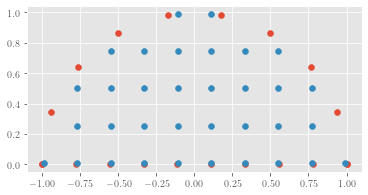

In [39]:
def get_robne(N):
    t = np.linspace(0, 1, N)
    base = np.array([[x,0] for x in 2*t-1])
    perimeter = np.array([
        [np.cos(phi), np.sin(phi)] for phi in np.linspace(0, np.pi, N)]
    )
    return np.concatenate([base, perimeter])

def pogoj(x,y):
    return x**2 + y**2 < 1
def get_tocke(N):
    h=1e-2
    tx = np.linspace(-1+h, 1-h, 2*N)
    ty = np.linspace(h, 1-h, N)
    
    tocke = [[x,y] for x in tx for y in ty if pogoj(x,y)]
    return np.array(tocke)
robne = get_robne(10)
tocke = get_tocke(5)
plt.scatter(robne[:, 0], robne[:, 1])
plt.scatter(tocke[:, 0], tocke[:, 1])
plt.axes().set_aspect("equal")
plt.savefig("2-tocke_5_10.pdf")
plt.show()

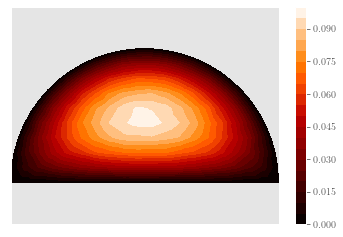

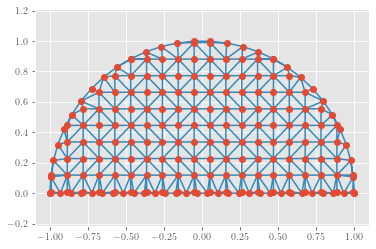

In [46]:
import numpy as np
from scipy.spatial import Delaunay
from scipy.spatial import delaunay_plot_2d
import matplotlib.pyplot as plt




tocke = get_tocke(10)
outer = get_robne(30)
len_outer = outer.shape[0]

points = np.concatenate([outer, tocke])

len_all = points.shape[0]


tri = Delaunay(points, furthest_site=False)  # triangulation
nodes = tri.simplices  # we get the nodes of triangles
# print(nodes)


K = np.zeros((len_all, len_all))
F = np.zeros(len_all)

T = len(nodes)
k = 0
for i in range(T):
    l, m, n = (
        nodes[k][0],
        nodes[k][1],
        nodes[k][2],
    )  # x1, x2 and x3 nodes of triangle; not the coordinates
    # print(l,m,n)
    Pe = [
        [1, points[l][0], points[l][1]],
        [1, points[m][0], points[m][1]],
        [1, points[n][0], points[n][1]],
    ]  # matrix with 1,x1,x2,x3,y1,y2,y3
    Pe = np.array(Pe)  # matrix for a triangle
    jac_det = np.linalg.det(Pe)  # 2 * area of the triangle

    # computing local stiffness matrix elements
    A11 = (
        (points[m][1] - points[n][1]) ** 2 + (points[n][0] - points[m][0]) ** 2
    ) / jac_det
    A12 = (
        (points[m][1] - points[n][1]) * (points[n][1] - points[l][1])
        + (points[n][0] - points[m][0]) * (points[l][0] - points[n][0])
    ) / jac_det
    A13 = (
        (points[m][1] - points[n][1]) * (points[l][1] - points[m][1])
        + (points[n][0] - points[m][0]) * (points[m][0] - points[l][0])
    ) / jac_det
    A22 = (
        (points[n][1] - points[l][1]) * (points[n][1] - points[l][1])
        + (points[l][0] - points[n][0]) * (points[l][0] - points[n][0])
    ) / jac_det
    A23 = (
        (points[n][1] - points[l][1]) * (points[l][1] - points[m][1])
        + (points[l][0] - points[n][0]) * (points[m][0] - points[l][0])
    ) / jac_det
    A33 = (
        (points[l][1] - points[m][1]) ** 2 + (points[m][0] - points[l][0]) ** 2
    ) / jac_det
    # print('A11:',A11,'\nA12:',A12, '\nA12:',A13,'\nA22:',A22,'\nA23:',A23,'\nA33: ', A33)

    K[l][l] = K[l][l] + A11
    K[l][m] = K[l][m] + A12
    K[m][l] = K[m][l] + A12
    K[l][n] = K[l][n] + A13
    K[n][l] = K[n][l] + A13
    K[m][m] = K[m][m] + A22
    K[m][n] = K[m][n] + A23
    K[n][m] = K[n][m] + A23
    K[n][n] = K[n][n] + A33
    # print(K[0][0], K[1][1],K[1][0],K[0][1])

    Fe = jac_det / 3  # in truth 1/6 but it's easier to consider 1/2 here
    """F[l]=F[l] + ((points[m][0]-points[l][0])*(points[n][1]-points[l][1]) -
         (points[n][0]-points[l][0])*(points[m][1]-points[l][1]))/6
    F[m]=F[m] + ((points[n][0]-points[m][0])*(points[l][1]-points[m][1]) -
        (points[l][0]-points[m][0])*(points[n][1]-points[m][1]))/6
    F[n]=F[n] + ((points[l][0]-points[n][0])*(points[m][1]-points[n][1]) -
         (points[m][0]-points[n][0])*(points[l][1]-points[n][1]))/6"""
    F[l] = F[l] + Fe
    F[m] = F[m] + Fe
    F[n] = F[n] + Fe
    k = k + 1


b = [i for i in range(len_outer)]  # boundary nodes


Fb = F
for i in b:
    Fb[i] = 0
Kb = K

for i in range(len(points)):
    for j in b:
        Kb[i][j] = 0
        Kb[j][i] = 0
for i in b:
    Kb[i][i] = 1


Phi = np.linalg.solve(Kb, Fb)


X = []
Y = []
for i in range(len(points)):
    X.append(points[i][0])
    Y.append((points[i][1]))
%matplotlib inline
plt.figure(0)
plt.tricontourf(X, Y, Phi, levels=20, cmap="gist_heat")
plt.colorbar()
plt.axis("equal")
plt.xticks([])
plt.yticks([])
plt.savefig(f"2-polkrog-u-{len_outer}_random.pdf")
plt.show()


delaunay_plot_2d(tri)
plt.axis("equal")
plt.savefig(f"2-polkrog-delauney-{len_outer}_random.pdf")
plt.show()